In [165]:
import pandas as pd
import pickle
import random
import numpy as np
import nltk
import os
import gensim
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from nltk.corpus import PlaintextCorpusReader
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from nltk.metrics import confusionmatrix
from nltk.metrics.scores import precision, recall
import pickle

In [2]:
data=pd.read_csv('C:/Users/Thu/Desktop/TextAnalytics/review_df1.csv')
data.shape

(3520, 19)

In [3]:
data.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,3520.000000,3520.000000,3520.000000,3520.00000,3520.000000,3520.000000,3520.000000,3499.000000,3499.000000
mean,512.143750,8.371392,24.834375,2799.09517,18.568466,7.220170,8.196534,49.589594,2.636599
std,499.309231,0.549352,31.884464,2352.42768,21.680424,10.957646,1.644556,3.401334,4.384972
min,8.000000,6.400000,2.000000,49.00000,2.000000,1.000000,2.500000,41.328376,-0.369758
25%,176.000000,8.100000,7.000000,1188.50000,6.000000,1.000000,7.100000,48.839832,-0.145279
50%,360.000000,8.400000,15.000000,2272.00000,12.000000,3.000000,8.800000,51.501400,-0.021121
75%,696.500000,8.800000,31.000000,3773.00000,23.000000,9.000000,9.600000,51.516718,4.817817
max,2682.000000,9.600000,370.000000,16670.00000,342.000000,169.000000,10.000000,52.400181,16.421974


In [4]:
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Country,City
0,626 Chiswick High St Chiswick London W4 5RY Un...,562,7/14/2016,8.5,Clayton Hotel Chiswick,United Kingdom,couldn t get the air con to shut off kept tur...,16,1944,big room and bathroom was given quieter rear ...,12,63,8.8,"[' Leisure trip ', ' Couple ', ' Deluxe Twin R...",385 day,51.492418,-0.278470,United Kingdom,London
1,78 84 Sussex Gardens Westminster Borough Londo...,636,7/12/2016,7.7,Shaftesbury Metropolis London Hyde Park,United Kingdom,the wait for our room to be ready we arrived ...,58,2867,the location to hyde park and paddington were...,14,3,6.3,"[' With a pet ', ' Leisure trip ', ' Couple ',...",387 day,51.516689,-0.170615,United Kingdom,London
2,24 Ludgate Hill City of London London EC4M 7DR...,918,6/3/2017,8.4,Club Quarters Hotel St Paul s,United Kingdom,the aircon was a little temperamental,8,4117,location is wonderful price is excellent for ...,19,18,9.6,"[' Business trip ', ' Solo traveler ', ' Stand...",61 days,51.513930,-0.101126,United Kingdom,London
3,Stratton Street Mayfair Westminster Borough Lo...,581,2/21/2016,8.4,The May Fair Hotel,United Kingdom,bedroom could have been better there was a te...,23,1994,the bathroom was my favourite and the mayfair...,15,1,9.6,"[' Leisure trip ', ' Couple ', ' Superior King...",529 day,51.507894,-0.143671,United Kingdom,London
4,52 54 Upper Richmond Road Wandsworth London SW...,144,8/11/2015,8.2,The Lodge Hotel Putney,United Kingdom,everything from start to finish noisy hotel b...,18,525,nothing worst hotel i have stayed in,9,2,3.3,"[' Leisure trip ', ' Couple ', ' Cosy Twin Roo...",723 day,51.457299,-0.205542,United Kingdom,London


**Method 1. Supervised Sentiment Polarity Classification**

In [191]:
positive_reviews = data['Positive_Review']
negative_reviews = data['Negative_Review']

In [192]:
labels = []
corpus = []

In [193]:
stop_list = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()

In [194]:
for positive_review in positive_reviews:
    labels.append(1)
    sent=nltk.word_tokenize(positive_review)
    sent=[w.lower() for w in sent]
    sent=[w for w in sent if w not in stop_list]
    sent=[stemmer.stem(w) for w in sent]
    corpus.append(sent)

for negative_review in negative_reviews:
    labels.append(0)
    sent=nltk.word_tokenize(negative_review)
    sent=[w.lower() for w in sent]
    sent=[w for w in sent if w not in stop_list]
    sent=[stemmer.stem(w) for w in sent]
    corpus.append(sent)
    

In [195]:
i_train, i_test = train_test_split(range(len(labels)), test_size=0.2,random_state=1)

In [196]:
train_corpus = np.array(corpus)[i_train].tolist()

In [197]:
dictionary = gensim.corpora.Dictionary(train_corpus)

In [198]:
labeled_data = []

In [199]:
for (l,s) in zip(labels,corpus):
    vector = dictionary.doc2bow(s)
    sent_as_dict = {id:1 for (id,tf) in vector}
    labeled_data.append((sent_as_dict,l))

In [200]:
X_train = np.array(labeled_data)[i_train].tolist()
X_test = np.array(labeled_data)[i_test].tolist()

In [201]:
len(X_train), len(X_test)

(5632, 1408)

In [28]:
classifier = nltk.NaiveBayesClassifier.train(X_train)

In [29]:
nltk.classify.accuracy(classifier,X_test)

0.9012784090909091

In [202]:
pred = [classifier.classify(o[0]) for o in X_test]

In [203]:
lbl = [o[1] for o in X_test]

In [91]:
from sklearn.metrics import confusion_matrix

confusion_matrix(lbl, pred)

array([[630,  77],
       [ 62, 639]], dtype=int64)

In [129]:
pd.crosstab(pd.Series(lbl), pd.Series(pred), rownames=['Label'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Label,,,
0,630,77,707
1,62,639,701
All,692,716,1408


In [170]:
def pre_process(s):
    sent=nltk.word_tokenize(s)
    sent=[w.lower() for w in sent]
    sent=[w for w in sent if w not in stop_list]
    sent=[stemmer.stem(w) for w in sent]
    vector = dictionary.doc2bow(sent)
    sent_as_dict = {id:1 for (id,tf) in vector}
    return sent_as_dict

In [180]:
def get_sentiment_from(review):
    sent_as_dict = pre_process(review)
    pred = classifier.classify(sent_as_dict)
    res = 'pos' if pred == 1 else 'neg'
    return res

In [181]:
get_sentiment_from("This place was the best I have ever been to")

'pos'

In [217]:
combined_reviews = pd.concat([positive_reviews, negative_reviews]).reset_index(drop=True)

In [219]:
combined_reviews_test = combined_reviews[i_test].reset_index(drop=True)

In [214]:
len(combined_reviews_test), len(pred), len(lbl)

(1408, 1408, 1408)

In [220]:
combined_reviews_test

0                                                 pricing
1        location of the hotel is excellent its in the...
2                            great beds location nice gym
3        location staff ambient restaurant and bar siz...
4        the staff were so friendly and helpful i like...
                              ...                        
1403     it s an okay hotel if you need a place near p...
1404          size of the room tiny for an executive room
1405     breakfast fruits are fresh n seasonal overall...
1406     need new dark carpets to not see stains curta...
1407     the design fixtures were dated bathroom fixtu...
Length: 1408, dtype: object

In [222]:
wrong_pred = combined_reviews_test[pd.Series(pred) != pd.Series(lbl)]

In [287]:
a = combined_reviews_test[(pd.Series(pred)==1) & (pd.Series(lbl)==0)]

In [288]:
a

23       value for the money you pay is not really the...
60       all was superb staff were exceptionally profe...
61                                   everything was good 
81                         no pubs or restaurants near by
100              not enough comfortable seating in rooms 
                              ...                        
1292           the beds could have been more comfortable 
1354                                    no free breakfast
1359     the location was ok for me as i like to walk ...
1378     some people found rooms too warm but i found ...
1397     bed is not comfortable sheets and blanket not...
Length: 77, dtype: object

In [291]:
b = combined_reviews_test[(pd.Series(pred)==0) & (pd.Series(lbl)==1)]

In [292]:
b

44                                                nothing
52                                          swimming pool
55       beautiful new room and exceptional customer s...
69       ok inside weird though set up if i would have...
74       the rooms are very nicely decorated but that ...
                              ...                        
1289     the food in the restaurant was good value alt...
1319                                               fridge
1341                                    24 hour reception
1345     location is very convenient still not a reall...
1379     the hotel has a airport shuttle that starts r...
Length: 62, dtype: object

In [256]:
wrong_pred.values[1]

' nothing'

In [226]:
get_sentiment_from('value for the money you pay is not really there location is really what you are paying for')

'pos'

**Method 2. Lexicon-based Sentiment Polarity Classification**

In [93]:
pos_lexicon = './Lab8-stu/positive-words.txt'
neg_lexicon = './Lab8-stu/negative-words.txt'

In [94]:
data['Reviews'] = data['Positive_Review'] + data['Negative_Review']

In [95]:
data1 = data['Reviews']

In [96]:
corpus1 = []

In [97]:
#Read the positive sentiment lexicon
pos_dict = {}
f = open(pos_lexicon,'r')
for line in f:
    line = line.strip()
    pos_dict[line]=1
f.close()

#Read the negative sentiment lexicon
neg_dict = {}
f = open(neg_lexicon,'r')
for line in f:
    line = line.strip()
    neg_dict[line]=1
f.close()

In [116]:
positive_scores = []
negative_scores = []
positive_pcts = []
negative_pcts = []
scores = []
predicted_labels = []

In [117]:
for review in corpus:
    
    positive_score = 0
    negative_score = 0
    for w in review:
        if w in pos_dict:
            positive_score = positive_score + 1
        elif w in neg_dict:
            negative_score = negative_score + 1

    score = positive_score - negative_score
    if score >= 0:
        predicted_labels.append(1)
    else:
        predicted_labels.append(0)
    
    scores.append(score)

In [119]:
len(predicted_labels), len(labels)

(7040, 7040)

In [121]:
total = len(labels)
correct = 0

In [122]:
for (tl, pl) in zip(labels, predicted_labels):
    if tl == pl:
        correct = correct + 1

In [123]:
accuracy = correct / total
accuracy

0.6038352272727273

In [124]:
confusion_matrix(labels, predicted_labels)

array([[ 772, 2748],
       [  41, 3479]], dtype=int64)

In [128]:
pd.crosstab(pd.Series(labels), pd.Series(predicted_labels), rownames=['Label'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Label,,,
0,772,2748,3520
1,41,3479,3520
All,813,6227,7040


In [182]:
def pre_process_lex(s):
    sent=nltk.word_tokenize(s)
    sent=[w.lower() for w in sent]
    sent=[w for w in sent if w not in stop_list]
    sent=[stemmer.stem(w) for w in sent]
    return sent

In [183]:
def get_sentiment_from_lex(s):
    sent = pre_process_lex(s)
    positive_score = 0
    negative_score = 0
    for w in sent:
        if w in pos_dict:
            positive_score = positive_score + 1
        elif w in neg_dict:
            negative_score = negative_score + 1

    score = positive_score - negative_score
    res = 'pos' if score >= 0 else 'neg'
    return res

In [185]:
get_sentiment_from_lex("This place was the worst I have ever been to")

'neg'

In [238]:
len(combined_reviews), len(labels), len(predicted_labels)

(7040, 7040, 7040)

In [239]:
wrong_pred_lex = combined_reviews[pd.Series(labels) != pd.Series(predicted_labels)]

In [270]:
wrong_pred_lex.values[200]

' nothing this was my best hotel experience in many many years of travelling '

In [297]:
get_sentiment_from_lex('    breakfast was pricey but good   ')

'pos'

In [298]:
get_sentiment_from('    breakfast was pricey but good  ')

'pos'

In [273]:
predicted_labels==1

False

## Predict Review Score

In [131]:
corpus1 = []
positive_scores1 = []
negative_scores1 = []
positive_pcts = []
negative_pcts = []
scores1 = []
predicted_labels1 = []

In [132]:
for review in data1:
    review=nltk.word_tokenize(review)
    review=[w.lower() for w in review]
    review=[w for w in review if w not in stop_list]
    review=[stemmer.stem(w) for w in review]
    corpus1.append(review)
    positive_score1 = 0
    negative_score1 = 0
    for w in review:
        if w in pos_dict:
            positive_score1 = positive_score1 + 1
        elif w in neg_dict:
            negative_score1 = negative_score1 + 1
    if positive_score1 + negative_score1 != 0:
        positive_pct = positive_score1 / (positive_score1 + negative_score1)
        negative_pct = negative_score1 / (positive_score1 + negative_score1)
    else:
        positive_pct = 0
        negative_pct = 0
    score1 = positive_score1 - negative_score1
    if score1 >= 0:
        predicted_labels1.append(1)
    else:
        predicted_labels1.append(0)
    positive_scores1.append(positive_score1)
    negative_scores1.append(negative_score1)
    positive_pcts.append(positive_pct)
    negative_pcts.append(negative_pct)
    scores1.append(score1)
   

(array([1.00e+00, 2.00e+00, 5.00e+00, 2.00e+00, 9.00e+00, 2.30e+01,
        7.20e+01, 1.95e+02, 7.16e+02, 1.42e+03, 4.54e+02, 2.70e+02,
        1.49e+02, 7.50e+01, 4.80e+01, 3.60e+01, 1.60e+01, 1.40e+01,
        6.00e+00, 2.00e+00, 3.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00]),
 array([-9.        , -7.88888889, -6.77777778, -5.66666667, -4.55555556,
        -3.44444444, -2.33333333, -1.22222222, -0.11111111,  1.        ,
         2.11111111,  3.22222222,  4.33333333,  5.44444444,  6.55555556,
         7.66666667,  8.77777778,  9.88888889, 11.        , 12.11111111,
        13.22222222, 14.33333333, 15.44444444, 16.55555556, 17.66666667,
        18.77777778, 19.88888889, 21.        ]),
 <a list of 27 Patch objects>)

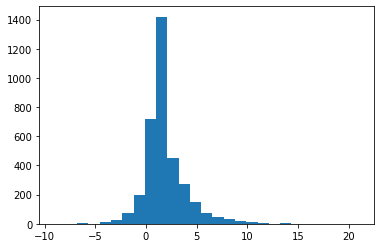

In [159]:
plt.hist(scores1,bins=27)

(array([1.429e+03, 7.080e+02, 5.330e+02, 3.450e+02, 2.040e+02, 1.180e+02,
        7.100e+01, 4.800e+01, 2.100e+01, 1.600e+01, 9.000e+00, 5.000e+00,
        5.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.        ,  1.04761905,  2.0952381 ,  3.14285714,  4.19047619,
         5.23809524,  6.28571429,  7.33333333,  8.38095238,  9.42857143,
        10.47619048, 11.52380952, 12.57142857, 13.61904762, 14.66666667,
        15.71428571, 16.76190476, 17.80952381, 18.85714286, 19.9047619 ,
        20.95238095, 22.        ]),
 <a list of 21 Patch objects>)

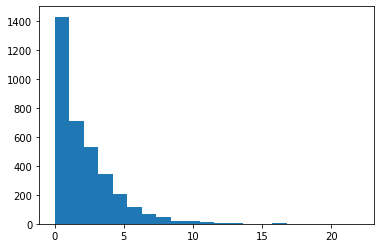

In [133]:
plt.hist(positive_scores1, bins=21)

In [134]:
np.median(positive_scores1)

2.0

In [163]:
np.mean(positive_scores1)

2.427840909090909

In [135]:
np.max(positive_scores1)

22

In [136]:
np.std(positive_scores1)

2.2135732881390693

In [137]:
len([s for s in positive_scores1 if s == 0])

590

In [138]:
len(positive_scores1)

3520

(array([2.144e+03, 8.610e+02, 3.120e+02, 1.180e+02, 3.900e+01, 1.700e+01,
        9.000e+00, 9.000e+00, 4.000e+00, 4.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14.]),
 <a list of 14 Patch objects>)

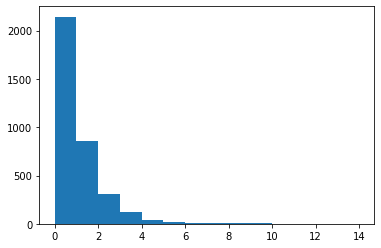

In [139]:
plt.hist(negative_scores1, bins=14)

In [160]:
np.median(negative_scores1)

0.0

In [164]:
np.mean(negative_scores1)

0.6536931818181818

In [161]:
np.max(negative_scores1)

14

In [162]:
np.std(negative_scores1)

1.1307745722005473

In [140]:
d = {'positive_score':positive_scores1,'negative_score':negative_scores1}

In [141]:
X = pd.DataFrame(d)
y = data['Reviewer_Score']

In [142]:
d

{'positive_score': [1,
  2,
  3,
  3,
  1,
  4,
  1,
  4,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  3,
  1,
  0,
  15,
  2,
  10,
  3,
  1,
  3,
  5,
  0,
  2,
  1,
  1,
  0,
  3,
  3,
  6,
  3,
  3,
  0,
  1,
  0,
  1,
  3,
  4,
  0,
  1,
  4,
  3,
  7,
  1,
  2,
  1,
  1,
  2,
  4,
  1,
  1,
  2,
  1,
  2,
  0,
  2,
  6,
  6,
  2,
  6,
  3,
  4,
  4,
  2,
  2,
  0,
  0,
  2,
  1,
  0,
  3,
  1,
  0,
  8,
  2,
  1,
  2,
  2,
  1,
  4,
  5,
  2,
  1,
  1,
  2,
  2,
  1,
  1,
  2,
  3,
  1,
  3,
  2,
  3,
  4,
  3,
  1,
  0,
  0,
  4,
  0,
  1,
  2,
  1,
  0,
  5,
  0,
  5,
  2,
  1,
  2,
  2,
  5,
  8,
  1,
  7,
  0,
  0,
  3,
  1,
  0,
  0,
  9,
  0,
  0,
  1,
  0,
  2,
  1,
  3,
  0,
  2,
  1,
  1,
  2,
  3,
  3,
  2,
  2,
  2,
  5,
  5,
  4,
  2,
  1,
  2,
  4,
  4,
  1,
  1,
  3,
  5,
  5,
  4,
  2,
  2,
  0,
  1,
  1,
  1,
  0,
  4,
  1,
  0,
  1,
  4,
  5,
  3,
  3,
  0,
  2,
  8,
  3,
  0,
  1,
  6,
  2,
  1,
  3,
  0,
  1,
  0,
  2,
  4,
  0,
  2,
  1,
  1,
  11,
  1,
  3,
  0,
  3,

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [144]:
#Multi Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
coeff = pd.DataFrame({'variable':X_train.columns,'coefficient':regressor.coef_})
print(coeff)

         variable  coefficient
0  positive_score     0.166061
1  negative_score    -0.501035


In [146]:
y_pred = regressor.predict(X_test)

In [147]:
RMSE = mean_squared_error(y_test,y_pred, squared = False)
RMSE

1.5356040336442982

In [148]:
#Random Forest
estimator = RandomForestRegressor(n_estimators = 200, random_state = 1)
estimator.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [149]:
y_pred = estimator.predict(X_test)

In [150]:
RMSE1 = mean_squared_error(y_test,y_pred, squared=False)
RMSE1

1.5548217363552317

Now we try running regression with positive_pct and negative_pct


In [151]:
d1 = {'positive_pct':positive_pcts,'negative_pct':negative_pcts}

In [152]:
X1 = pd.DataFrame(d1)
y1 = data['Reviewer_Score']
d2 = {'positive_pct':positive_pcts,'negative_pct':negative_pcts,'reviewer_score':y1}
d3 = {'positive_score':positive_scores,'negative_score':negative_scores,'reviewer_score':y1}

In [153]:
df = pd.DataFrame(d2)

In [154]:
df.head()

,positive_pct,negative_pct,reviewer_score
0,1.000000,0.000000,8.8
1,0.666667,0.333333,6.3
2,1.000000,0.000000,9.6
3,1.000000,0.000000,9.6
4,0.333333,0.666667,3.3


In [80]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=1)

In [81]:
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
coeff = pd.DataFrame({'variable':X1_train.columns,'coefficient':regressor.coef_})
print(coeff)

       variable  coefficient
0  positive_pct     0.584205
1  negative_pct    -1.425975


In [83]:
y1_pred = regressor.predict(X1_test)

In [84]:
RMSE = mean_squared_error(y1_test,y1_pred, squared = False)
RMSE

1.5508363885145038